### Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam


2025-07-01 09:27:07.395910: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-01 09:27:07.436095: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 09:27:13.003317: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-01 09:27:15.017610: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751362035.730488    2109 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751362035.79

In [2]:
# file path definition
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_features = pd.read_pickle(test_features_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the shape of the data
print("Training features shape:", training_features.shape)
print("Validation features shape:", validation_features.shape)
print("Training labels shape:", training_labels.shape)
print("Validation labels shape:", validation_labels.shape)
print("Test features shape:", test_features.shape)
print("Test labels shape:", test_labels.shape)

# Print the first few rows of the data
print("Training features:\n", training_features.head())
print("Validation features:\n", validation_features.head())
print("Training labels:\n", training_labels.head())
print("Validation labels:\n", validation_labels.head())
print("Test features:\n", test_features.head())
print("Test labels:\n", test_labels.head())


Training features shape: (6484, 51)
Validation features shape: (1852, 51)
Training labels shape: (6484, 1)
Validation labels shape: (1852, 1)
Test features shape: (928, 51)
Test labels shape: (928, 1)
Training features:
    Warengruppe_1.0  Warengruppe_2.0  Warengruppe_3.0  Warengruppe_4.0  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                1                0   
3                0                0                0                0   
4                0                0                1                0   

   Warengruppe_5.0  Warengruppe_6.0  KielerWoche_1.0  Wettercode_1.0  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               0   
3                0                1                0

### Defining Neural Network

In [3]:
# Create the model

model = Sequential([
    InputLayer(shape=(training_features.shape[1],)),
    BatchNormalization(),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

# print the model summary
model.summary()


2025-07-01 09:27:39.711935: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 51)             │           204 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 773 (3.02 KB)

 Trainable params: 671 (2.62 KB)

 Non-trainable params: 102 (408.00 B)

In [4]:
# Suppose 'date_column' is a datetime column in your DataFrame
training_features['Datum'] = pd.to_datetime(training_features['Datum'])
training_features['Datum'] = training_features['Datum'].astype('int64') // 10**9  # Convert to Unix timestamp

validation_features['Datum'] = pd.to_datetime(validation_features['Datum'])
validation_features['Datum'] = validation_features['Datum'].astype('int64') // 10**9

In [5]:
# Compile the model
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

# Train the model
history = model.fit(training_features, training_labels, epochs=20, validation_data=(validation_features, validation_labels))



Epoch 1/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 62354.3906 - val_loss: 50446.5430
Epoch 2/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 35291.7266 - val_loss: 14647.4189
Epoch 3/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13059.2275 - val_loss: 11369.2764
Epoch 4/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10484.8740 - val_loss: 8784.2646
Epoch 5/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9904.7783 - val_loss: 7382.4604
Epoch 6/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7861.3784 - val_loss: 6892.3994
Epoch 7/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7980.1431 - val_loss: 6770.4937
Epoch 8/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6297.2988 - val_loss: 6686.1313
Epoch 9/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6795.4336 - val_loss: 6633.3638
Epoch 10/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7184.2061 - val_loss: 6605.4473
Epoch 11/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7419.8320 -

### Saving the trained model


In [6]:
# saving the model
model.save('my_model_mm.h5')


### Plotting Training History

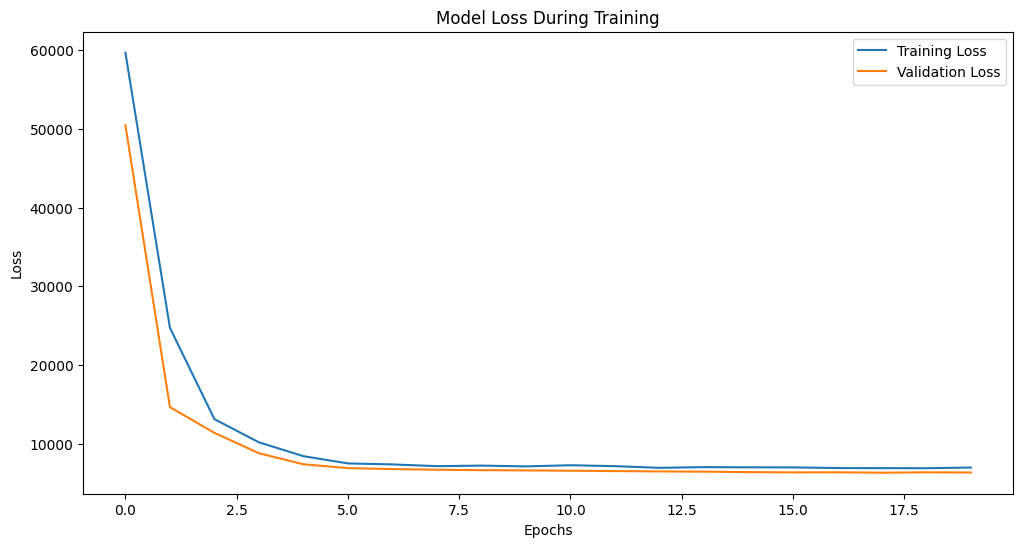

In [7]:
# plot the loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Making Predictions and Evaluating the Model

In [8]:
# elauate performance by mean percentage error mape

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)

print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

 41/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAPE on the Training Data: 31.66%
MAPE on the Validation Data: 33.12%


### Visualizing Predictions vs. Actual Values

In [9]:
# plot predicted vs. actual values
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Days')
    plt.ylabel('Sales in €')
    plt.legend()
    plt.show()

# Ensure numpy arrays for training_predictions etc
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# Print predictions type
print(type(training_predictions)) 
print(type(validation_predictions))

# Creating DataFrames with 1 D Arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


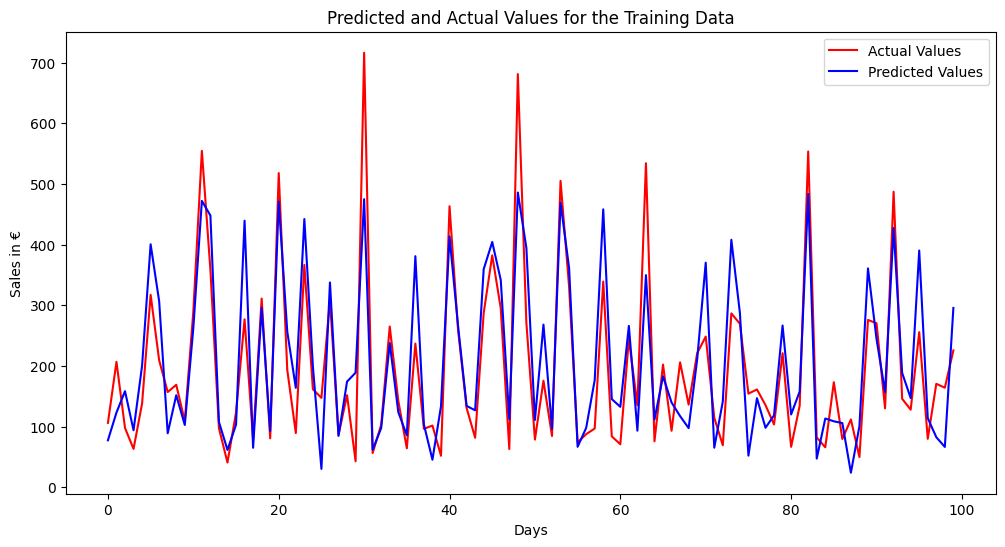

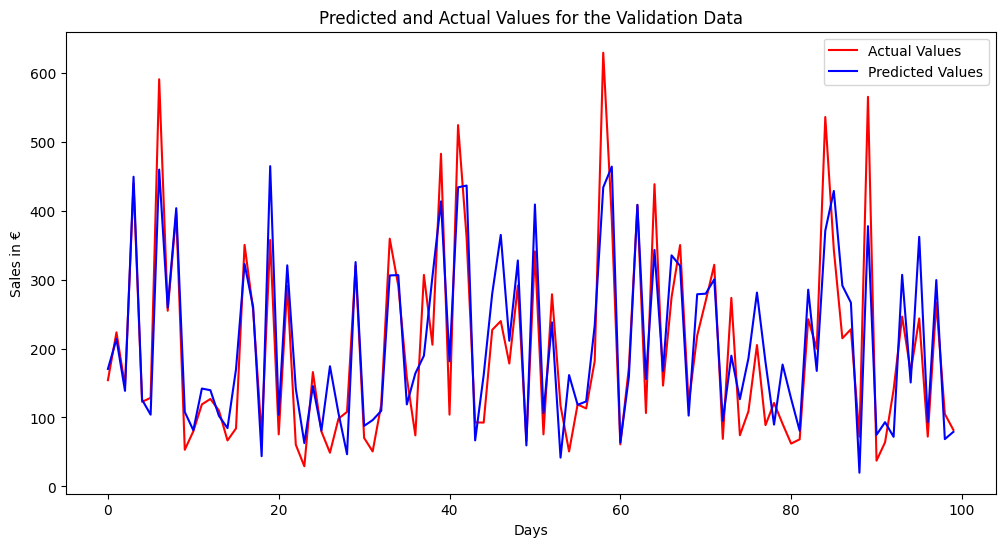

In [10]:

# plot predictions 
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')





In [11]:
# evaluate prediction
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

print("Mean Squared Error (MSE):", mean_squared_error(data_train['actual'], data_train['prediction']))
print("Mean Absolute Error (MAE):", mean_absolute_error(data_train['actual'], data_train['prediction']))
print("R-squared (R^2):", r2_score(data_train['actual'], data_train['prediction']))


Mean Squared Error (MSE): 6426.85079777898
Mean Absolute Error (MAE): 53.270252694396746
R-squared (R^2): 0.6933261579081378
